# 3 To - Do - Task
Please Complete all the problem listed below.
3.1 Warming Up Exercises - Basic Inspection and Exploration:
Problem 1 - Data Read, Write and Inspect:
Complete all following Task:
• Dataset for the Task: "bank.csv"

In [3]:
import pandas as pd

In [4]:
#1
df = pd.read_csv("/content/drive/MyDrive/Concept And Technology Of AI/bank.csv")
print(df.head())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


# 2. Check info of the DataFrame and identify following:
(a) columns with dtypes=object

(b) unique values of those columns.

(c) check for the total number of null values in each column.

In [38]:
#2a
obj_colmn = df.select_dtypes(include=['object']).columns
print("Object columns: ")
print(obj_colmn)


Object columns: 
Index(['Sex', 'Embarked'], dtype='object')


In [40]:
#2b
uni = df[obj_colmn].nunique()
print("Unique values:\n", uni)

Unique values:
 Sex         2
Embarked    3
dtype: int64


In [41]:
#2c
print("total number of null values in each column: ")
print(df.isnull().sum())

total number of null values in each column: 
Survived    0
Sex         0
Embarked    0
dtype: int64


3. Drop all the columns with dtypes object and store in new DataFrame, also write the DataFrame in
”.csv” with name ”banknumericdata.csv”

In [8]:
df_numeric = df.drop(columns=obj_colmn)
df_numeric.to_csv("banknumericdata.csv", index= False)
df_numeric.head()

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


In [10]:
from google.colab import files
files.download("banknumericdata.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

4. Read ”banknumericdata.csv” and Find the summary statistics.

In [11]:
df_new = pd.read_csv("banknumericdata.csv")
df_new.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# Problem 2 - Data Imputations:
Complete all the following Task:
• Dataset for the Task: "medical_student.csv"
1. Load the provided dataset and import in pandas DataFrame.

In [13]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Concept And Technology Of AI/medical_students_dataset.csv")
df.head()


,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.0,Female,161.777924,72.354947,O,27.645835,NaN,95.0,109.0,203.0,No,NaN
1,2.0,NaN,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,NaN,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,5.0,23.0,Female,NaN,46.234173,O,NaN,98.480008,95.0,NaN,231.0,No,No


2. Check info of the DataFrame and identify column with missing (null) values.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB


3. For the column with missing values fill the values using various techniques we discussed above. Try
to explain why did you select the particular methods for particular column.

In [15]:
df.isnull().sum()
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Height'] = df['Height'].fillna(df['Height'].mean())
df['gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Blood Type'] = df['Blood Type'].fillna(df['Blood Type'].mode()[0])
df.isnull().sum()


,0
Student ID,20000
Age,0
Gender,20000
Height,0
Weight,20000
Blood Type,0
BMI,20000
Temperature,20000
Heart Rate,20000
Blood Pressure,20000


For numeric columns with missing entries, I applied median imputation, as the median remains stable even when the data contains outliers or is skewed, making it a more dependable substitute.

For numerical columns that followed a normal distribution, I used the mean because it reflects the overall central tendency of the data.

For object-type columns, I used the mode, since categorical values cannot be averaged, and the mode preserves consistency by retaining the most frequent category in that column.

4. Check for any duplicate values present in Dataset and do necessary to manage the duplicate items.
{Hint: dataset.duplicated.sum()}

In [16]:
print("Number of duplicate rows:", df.duplicated().sum())
df = df.drop_duplicates()
print("After removal, duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 8174
After removal, duplicate rows: 0


# 3.2 Exercises - Data Cleaning and Transformations with ”Titanic Dataset”:
Dataset Used: "titanic.csv"
Problem - 1:
Create a DataFrame that is subsetted for the columns ’Name’, ’Pclass’, ’Sex’, ’Age’, ’Fare’, and ’Survived’.
Retain only those rows where ’Pclass’ is equal to 1, representing first--class passengers. What is the mean,
median, maximum value, and minimum value of the ’Fare’ column?

In [17]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Concept And Technology Of AI/Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
titanic_sub = df[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]
print(titanic_sub.head())

                                                Name  Pclass     Sex   Age  \
0                            Braund, Mr. Owen Harris       3    male  22.0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...       1  female  38.0   
2                             Heikkinen, Miss. Laina       3  female  26.0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)       1  female  35.0   
4                           Allen, Mr. William Henry       3    male  35.0   

      Fare  Survived  
0   7.2500         0  
1  71.2833         1  
2   7.9250         1  
3  53.1000         1  
4   8.0500         0  


In [20]:
firstclass = titanic_subset[titanic_subset['Pclass'] == 1]
print(firstclass.head())

                                                 Name  Pclass     Sex   Age  \
1   Cumings, Mrs. John Bradley (Florence Briggs Th...       1  female  38.0   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)       1  female  35.0   
6                             McCarthy, Mr. Timothy J       1    male  54.0   
11                           Bonnell, Miss. Elizabeth       1  female  58.0   
23                       Sloper, Mr. William Thompson       1    male  28.0   

       Fare  Survived  
1   71.2833         1  
3   53.1000         1  
6   51.8625         0  
11  26.5500         1  
23  35.5000         1  


In [22]:
fareMean = firstclass['Fare'].mean()
fareMedian = firstclass['Fare'].median()
fareMax = firstclass['Fare'].max()
fareMin = firstclass['Fare'].min()

print("Fare Statistics for First-Class Passengers:")
print(f"Mean: {fareMean}")
print(f"Median: {fareMedian}")
print(f"Maximum: {fareMax}")
print(f"Minimum: {fareMin}")


Fare Statistics for First-Class Passengers:
Mean: 84.1546875
Median: 60.287499999999994
Maximum: 512.3292
Minimum: 0.0


# Problem - 2:
How many null values are contained in the ’Age’ column in your subsetted DataFrame? Once you’ve found
this out, drop them from your DataFrame.

In [24]:
nullAgeCount = titanic_sub['Age'].isnull().sum()
print("Number of null values in 'Age':", nullAgeCount)

titanic_subset_clean = titanic_sub.dropna(subset=['Age'])
print("Null values in 'Age' after dropping:", titanic_subset_clean['Age'].isnull().sum())

Number of null values in 'Age': 177
Null values in 'Age' after dropping: 0


# Problem - 3:
The ’Embarked’ column in the Titanic dataset contains categorical data representing the ports of embarka-
tion:
• ’C’ for Cherbourg
• ’Q’ for Queenstown
• ’S’ for Southampton
Task:
1. Use one-hot encoding to convert the ’Embarked’ column into separate binary columns (’Embarked C’,
’Embarked Q’, ’Embarked S’).

In [26]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Concept And Technology Of AI/Titanic-Dataset.csv")
print(df['Embarked'].unique())
embarked_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked')
print(df.head())

['S' 'C' 'Q' nan]
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500  

2. Add these new columns to the original DataFrame.

In [27]:
df = pd.concat([df, embarked_dummies], axis=1)
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  Embarked_C  Embarked_Q  \
0      0         A/5 21171   7.2500   NaN        S       False       False   
1      0          PC 17599  71.2833   C85        C        True       False   
2      0  STON/O2. 3101282   7.9250   NaN        S       False       False   
3      0

3. Drop the original ’Embarked’ column.

In [28]:
df.drop('Embarked', axis=1, inplace=True)

4. Print the first few rows of the modified DataFrame to verify the changes.

In [29]:
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin  Embarked_C  Embarked_Q  Embarked_S  
0      0         A/5 21171   7.2500   NaN       False       False        True  
1      0          PC 17599  71.2833   C85        True       False       False  
2      0  STON/O2. 3101282   7.9250   NaN       False       False        True  


# Problem - 4:
Compare the mean survival rates (’Survived’) for the different groups in the ’Sex’ column. Draw a visual-
ization to show how the survival distributions vary by gender.

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("/content/drive/MyDrive/Concept And Technology Of AI/Titanic-Dataset.csv");
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [31]:
survivalBySex = df.groupby('Sex')['Survived'].mean()
print(survivalBySex)

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


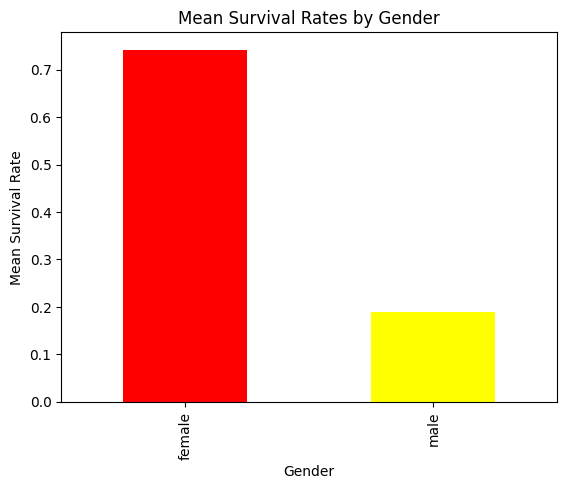

In [34]:
plt.figure()
survivalBySex.plot(kind='bar', color=['Red', 'Yellow'])
plt.title('Mean Survival Rates by Gender')
plt.xlabel('Gender')
plt.ylabel('Mean Survival Rate')
plt.show()

# Problem - 5:
Draw a visualization that breaks your visualization from Exercise 3 down by the port of embarkation (’Em-
barked’). In this instance, compare the ports ’C’ (Cherbourg), ’Q’ (Queenstown), and ’S’ (Southampton).

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("/content/drive/MyDrive/Concept And Technology Of AI/Titanic-Dataset.csv");
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


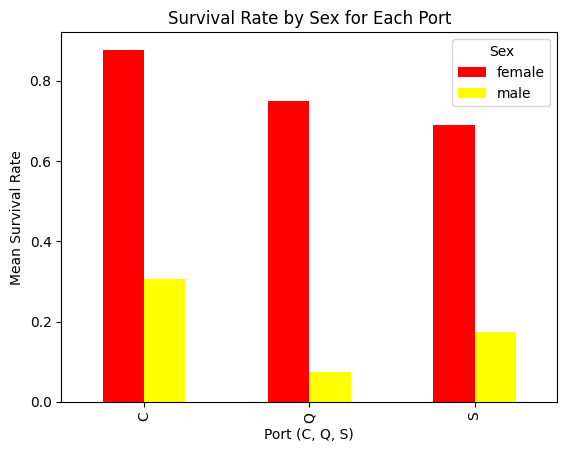

In [37]:
df = df[['Survived','Sex','Embarked']].dropna()
survivalByEmbarked = df.groupby(['Embarked', 'Sex'])['Survived'].mean().unstack()
survivalByEmbarked.plot(kind='bar', color=['Red', 'Yellow'])
plt.title("Survival Rate by Sex for Each Port")
plt.xlabel("Port (C, Q, S)")
plt.ylabel("Mean Survival Rate")
plt.show()